Importing dependencies

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [263]:
df = pd.read_csv('train[1].csv')

In [264]:
df.shape

(29451, 12)

In [265]:
df.sample(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
24166,Dealer,1,0,2,BHK,1051.082615,0,1,"Balewadi,Pune",18.097689,74.735239,100.0
1486,Owner,0,0,3,BHK,1300.294406,1,1,"Chitrakoot,Jaipur",26.916670,75.866670,53.0
4643,Owner,0,0,3,BHK,1325.178389,1,1,"Zirakpur,Mohali",30.650000,76.820000,52.0
7001,Owner,0,0,2,BHK,1000.000000,1,1,"Canara Bank Colony,Bangalore",12.964266,77.585658,45.0
27107,Owner,1,1,2,BHK,1170.365068,0,1,"Manewada,Nagpur",21.093676,79.111965,32.7


In [266]:
df.drop('ADDRESS',axis=1,inplace=True) #Nearly equal value of Longitude and Latitude gives idea about the similar locations , so we can drop the column 'ADDRESS

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


Let's apply OneHotEncoding on columns : 'BHK_OR_RK' , 'POSTED_BY'

In [268]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[['BHK_OR_RK', 'POSTED_BY']]).toarray()
feature_labels = ohe.get_feature_names_out(['BHK_OR_RK', 'POSTED_BY'])
features = pd.DataFrame(feature_array, columns=feature_labels)
df = pd.concat([df, features], axis=1)
df.drop(['BHK_OR_RK', 'POSTED_BY'], axis=1, inplace=True)

In [269]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_OR_RK_BHK,BHK_OR_RK_RK,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746,0.999185,0.000815,0.021120,0.621065,0.357815
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713,0.028536,0.028536,0.143786,0.485130,0.479365
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


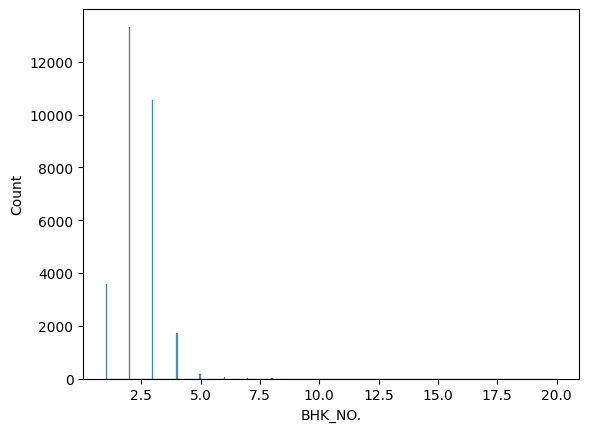

In [270]:
sns.histplot(df['BHK_NO.'])
plt.show()

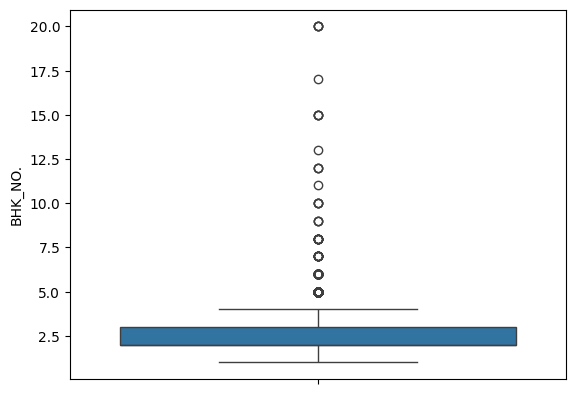

In [271]:
sns.boxplot(df['BHK_NO.'])
plt.show()

In [272]:
df = df[df['BHK_NO.']<=5]

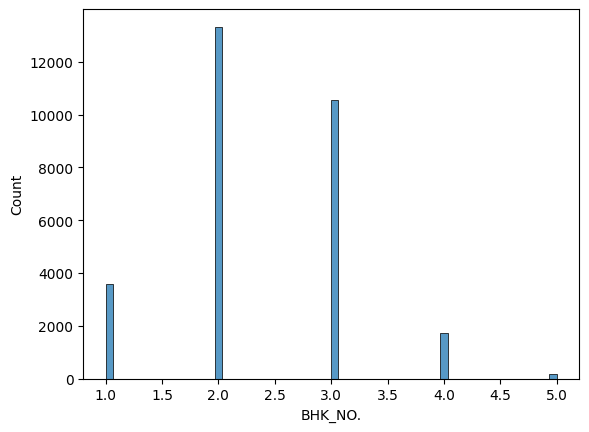

In [273]:
sns.histplot(df['BHK_NO.'])
plt.show()

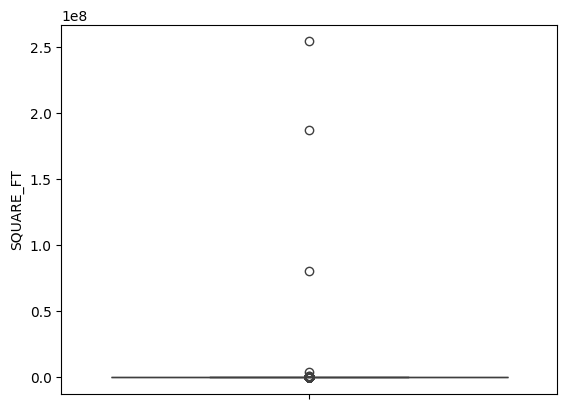

In [274]:
sns.boxplot(df['SQUARE_FT'])
plt.show()

In [275]:
def no_of_outliers(df,col):
  # Calculate IQR for 'SQUARE_FT'
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  # Define lower and upper bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print(f"Lower Bound: {max(0,lower_bound)}")
  print(f"Upper Bound: {upper_bound}")
  count_greater_than_upper_bound = len(df[df[col] > upper_bound])
  print(f"Number of values greater than upper_bound in {col}: {count_greater_than_upper_bound}")


In [276]:
no_of_outliers(df,'SQUARE_FT')

Lower Bound: 0
Upper Bound: 2525.185335
Number of values greater than upper_bound in SQUARE_FT: 1567


In [277]:
def no_of_values_above(df, col, threshold):
    count = len(df[df[col] > threshold])
    return count


In [278]:
no_of_values_above(df,'SQUARE_FT',5000)

295

In [279]:
df = df[df['SQUARE_FT']<=5000]

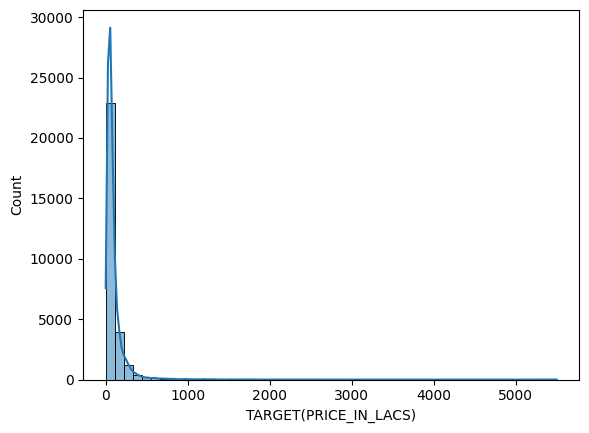

In [280]:
sns.histplot(df['TARGET(PRICE_IN_LACS)'],bins=50, kde=True)
plt.show()

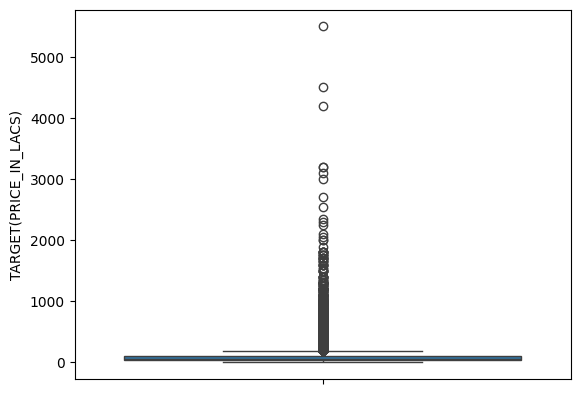

In [281]:
sns.boxplot(df['TARGET(PRICE_IN_LACS)'])
plt.show()

In [282]:
no_of_outliers(df,'TARGET(PRICE_IN_LACS)')

Lower Bound: 0
Upper Bound: 193.75
Number of values greater than upper_bound in TARGET(PRICE_IN_LACS): 2783


In [283]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_OR_RK_BHK,BHK_OR_RK_RK,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
count,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000,29062.000000
mean,0.178618,0.316737,2.366424,1280.071216,0.821382,0.933659,21.309326,76.837806,96.944767,0.999174,0.000826,0.020783,0.619813,0.359404
std,0.383039,0.465212,0.787207,620.429049,0.383039,0.248881,6.207181,10.619995,143.602421,0.028726,0.028726,0.142660,0.485441,0.479834
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,899.887514,1.000000,1.000000,18.452663,73.798100,37.500000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1167.325049,1.000000,1.000000,20.892133,77.326457,60.500000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,3.000000,1530.127734,1.000000,1.000000,26.900926,77.848959,100.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,5.000000,5000.000000,1.000000,1.000000,59.912884,152.962676,5500.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [284]:
no_of_values_above(df,'TARGET(PRICE_IN_LACS)',800)

185

In [285]:
df = df[df['TARGET(PRICE_IN_LACS)']<=800]

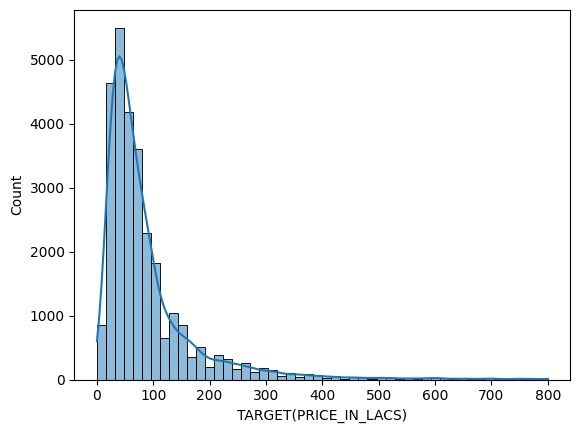

In [286]:
sns.histplot(df['TARGET(PRICE_IN_LACS)'],bins=50, kde=True)
plt.show()

In [287]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_OR_RK_BHK,BHK_OR_RK_RK,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
count,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000,28877.000000
mean,0.179104,0.317346,2.357863,1270.080765,0.820896,0.933615,21.319447,76.862573,89.034138,0.999169,0.000831,0.020916,0.617585,0.361499
std,0.383446,0.465451,0.780526,604.735493,0.383446,0.248958,6.220856,10.605064,91.317988,0.028818,0.028818,0.143107,0.485986,0.480443
min,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,-37.713008,-121.761248,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,898.181818,1.000000,1.000000,18.452663,73.814100,37.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,1163.019909,1.000000,1.000000,21.000000,77.333948,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,3.000000,1519.832985,1.000000,1.000000,26.900926,77.950834,100.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,5.000000,5000.000000,1.000000,1.000000,59.912884,152.962676,800.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
df.shape

(28877, 14)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28877 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     28877 non-null  int64  
 1   RERA                   28877 non-null  int64  
 2   BHK_NO.                28877 non-null  int64  
 3   SQUARE_FT              28877 non-null  float64
 4   READY_TO_MOVE          28877 non-null  int64  
 5   RESALE                 28877 non-null  int64  
 6   LONGITUDE              28877 non-null  float64
 7   LATITUDE               28877 non-null  float64
 8   TARGET(PRICE_IN_LACS)  28877 non-null  float64
 9   BHK_OR_RK_BHK          28877 non-null  float64
 10  BHK_OR_RK_RK           28877 non-null  float64
 11  POSTED_BY_Builder      28877 non-null  float64
 12  POSTED_BY_Dealer       28877 non-null  float64
 13  POSTED_BY_Owner        28877 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.3 MB


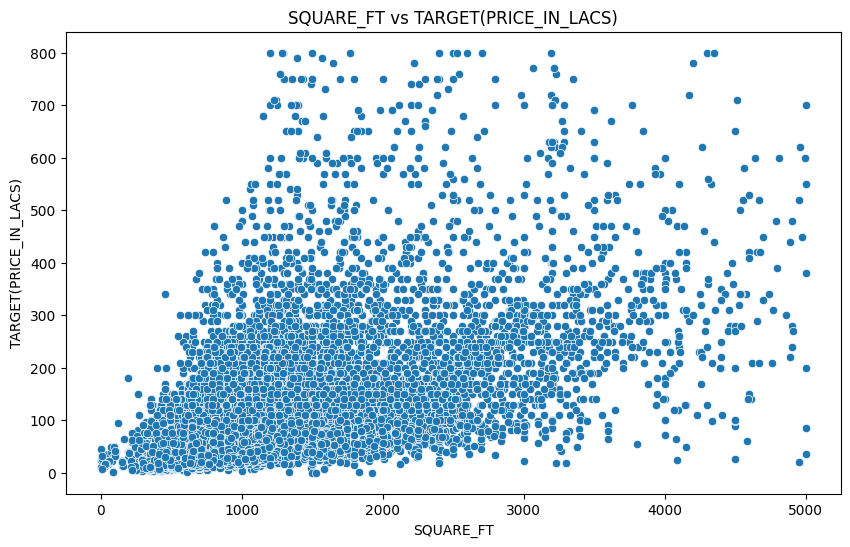

In [290]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', data=df)
plt.xlabel('SQUARE_FT')
plt.ylabel('TARGET(PRICE_IN_LACS)')
plt.title('SQUARE_FT vs TARGET(PRICE_IN_LACS)')
plt.show()

# Let's split the data

In [291]:
X = df.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = df['TARGET(PRICE_IN_LACS)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(23101, 13)
(5776, 13)
(23101,)
(5776,)


Applying StanderScaler on numerical columns

In [293]:
numerical_cols = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE']
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [294]:
X_train.sample(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,BHK_OR_RK_BHK,BHK_OR_RK_RK,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
1736,1,0,-1.736995,-1.143768,0,1,1.171140,0.046968,1.0,0.0,0.0,1.0,0.0
5041,0,1,-0.455209,-1.114758,1,1,1.151467,0.046537,1.0,0.0,0.0,1.0,0.0
7523,0,0,0.826578,1.305025,1,1,-1.351908,0.070142,1.0,0.0,0.0,0.0,1.0
10007,0,0,0.826578,0.512690,1,1,0.888235,-0.094003,1.0,0.0,0.0,0.0,1.0
4481,0,0,-0.455209,-1.432908,1,1,1.157204,0.015727,1.0,0.0,0.0,0.0,1.0


Tunning Paramenters for Random Forest Regresser Object

In [295]:
# Defining the parameter grid
param_grid = {
    'n_estimators': [20,50], # [5,7, 10, 15, 20, 50, 100] Values taken for 1st run code , Now removed some of them for simplicity
    'max_depth': [15, 20]  # [ 5, 10, 15, 20]  Values taken for 1st run code , Now removed some of them for simplicity
}

rnd_f = RandomForestRegressor(random_state=42)

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=rnd_f, param_grid=param_grid, cv=5, scoring='r2', verbose=2)  # Using 5-fold cross-validation


# Fitting the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)


# The best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ......................max_depth=15, n_estimators=20; total time=   1.6s
[CV] END ......................max_depth=15, n_estimators=20; total time=   2.1s
[CV] END ......................max_depth=15, n_estimators=20; total time=   1.5s
[CV] END ......................max_depth=15, n_estimators=20; total time=   1.5s
[CV] END ......................max_depth=15, n_estimators=20; total time=   1.4s
[CV] END ......................max_depth=15, n_estimators=50; total time=   3.6s
[CV] END ......................max_depth=15, n_estimators=50; total time=   4.2s
[CV] END ......................max_depth=15, n_estimators=50; total time=   3.8s
[CV] END ......................max_depth=15, n_estimators=50; total time=   3.6s
[CV] END ......................max_depth=15, n_estimators=50; total time=   3.8s
[CV] END ......................max_depth=20, n_estimators=20; total time=   2.4s
[CV] END ......................max_depth=20, n_es

In [300]:
# Train the model with the best hyperparameters
best_rnd_f = RandomForestRegressor(max_depth=15,n_estimators=50, random_state=42)
best_rnd_f.fit(X_train, y_train)

# Evaluate the model on the test set
best_rnd_f_train_score = best_rnd_f.score(X_train, y_train)
print(f"Train Score with Best Hyperparameters: {best_rnd_f_train_score}")
cv_scores = cross_val_score(best_rnd_f, X_train, y_train, cv=5, scoring='r2')
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")
best_rnd_f_test_score = best_rnd_f.score(X_test, y_test)
print(f"Test Score with Best Hyperparameters: {best_rnd_f_test_score}")


Train Score with Best Hyperparameters: 0.9432309546505341
Mean Cross-Validation Score: 0.7938036960039628
Test Score with Best Hyperparameters: 0.7917138827902911


Train Score: 0.9432 (Very High), But
Mean Cross-Validation Score: 0.7938 (Good Stability)
### The test score is very close to the cross-validation score (0.7938), which indicates that the model is not overfitting.

# END
